In [36]:
import ast
import pandas as pd

no_opa_data = []
with open("movie-wfs-no-opa-request-time.dat", 'r') as f:
    for line in f:
        no_opa_data.append(ast.literal_eval(line))

opa_all_allow_data = []
with open("movie-wfs-opa-all-allow-request-time.dat", 'r') as f:
    for line in f:
        opa_all_allow_data.append(ast.literal_eval(line))

opa_minimal_data = []
with open("movie-wfs-opa-minimal-request-time.dat", 'r') as f:
    for line in f:
        opa_minimal_data.append(ast.literal_eval(line))

opa_bulked_up_100_data = []
with open("movie-wfs-opa-bulked-up-100-request-time.dat", 'r') as f:
    for line in f:
        opa_bulked_up_100_data.append(ast.literal_eval(line))

opa_bulked_up_1000_data = []
with open("movie-wfs-opa-bulked-up-1000-request-time.dat", 'r') as f:
    for line in f:
        opa_bulked_up_1000_data.append(ast.literal_eval(line))

In [37]:
df_no_opa = pd.DataFrame(no_opa_data, columns=['src', 'dst', 'time_namelookup', 'time_connect', 'time_appconnect', 'time_pretransfer', 'time_redirect', 'time_starttransfer', 'time_total'])
df_opa_all_allow = pd.DataFrame(opa_all_allow_data, columns=['src', 'dst', 'time_namelookup', 'time_connect', 'time_appconnect', 'time_pretransfer', 'time_redirect', 'time_starttransfer', 'time_total'])
df_opa_minimal = pd.DataFrame(opa_minimal_data, columns=['src', 'dst', 'time_namelookup', 'time_connect', 'time_appconnect', 'time_pretransfer', 'time_redirect', 'time_starttransfer', 'time_total'])
df_opa_bulked_up_100 = pd.DataFrame(opa_bulked_up_100_data, columns=['src', 'dst', 'time_namelookup', 'time_connect', 'time_appconnect', 'time_pretransfer', 'time_redirect', 'time_starttransfer', 'time_total'])
df_opa_bulked_up_1000 = pd.DataFrame(opa_bulked_up_1000_data, columns=['src', 'dst', 'time_namelookup', 'time_connect', 'time_appconnect', 'time_pretransfer', 'time_redirect', 'time_starttransfer', 'time_total'])

float_cols = ['time_namelookup', 'time_connect', 'time_appconnect', 'time_pretransfer', 'time_redirect', 'time_starttransfer', 'time_total']

for col in float_cols:
    df_no_opa[col] = df_no_opa[col].astype(float)
    df_opa_all_allow[col] = df_opa_all_allow[col].astype(float)
    df_opa_minimal[col] = df_opa_minimal[col].astype(float)
    df_opa_bulked_up_100[col] = df_opa_bulked_up_100[col].astype(float)
    df_opa_bulked_up_1000[col] = df_opa_bulked_up_1000[col].astype(float)

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [48]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

In [49]:
df_no_opa.describe()

time_namelookup  time_connect  time_appconnect  time_pretransfer  \
count     21738.000000  21738.000000          21738.0      21738.000000   
mean          0.000035      0.000183              0.0          0.000236   
std           0.000063      0.000116              0.0          0.000154   
min           0.000022      0.000107              0.0          0.000141   
25%           0.000027      0.000143              0.0          0.000185   
50%           0.000030      0.000158              0.0          0.000203   
75%           0.000035      0.000183              0.0          0.000230   
max           0.006075      0.006232              0.0          0.006279   

       time_redirect  time_starttransfer    time_total  
count        21738.0        21738.000000  21738.000000  
mean             0.0            0.028727      0.028809  
std              0.0            0.023935      0.023941  
min              0.0            0.003622      0.003742  
25%              0.0            0.005824      0.005889  
50%              0.0            0.010134      0.010248  
75%              0.0            0.052544      0.052624  
max              0.0            0.365600      0.365668

In [45]:
df_opa_all_allow.describe()

time_namelookup  time_connect  time_appconnect  time_pretransfer  \
count      3869.000000   3869.000000           3869.0       3869.000000   
mean          0.000037      0.000200              0.0          0.000256   
std           0.000062      0.000166              0.0          0.000208   
min           0.000024      0.000117              0.0          0.000155   
25%           0.000027      0.000145              0.0          0.000187   
50%           0.000032      0.000164              0.0          0.000209   
75%           0.000037      0.000196              0.0          0.000247   
max           0.003066      0.004344              0.0          0.004632   

       time_redirect  time_starttransfer   time_total  
count         3869.0         3869.000000  3869.000000  
mean             0.0            0.027700     0.027795  
std              0.0            0.024823     0.024822  
min              0.0            0.005334     0.005642  
25%              0.0            0.008313     0.008386  
50%              0.0            0.011878     0.011961  
75%              0.0            0.054070     0.054166  
max              0.0            0.436301     0.436374

In [44]:
df_opa_minimal.describe()

time_namelookup  time_connect  time_appconnect  time_pretransfer  \
count      2430.000000   2430.000000           2430.0       2430.000000   
mean          0.000039      0.000214              0.0          0.000271   
std           0.000028      0.000127              0.0          0.000164   
min           0.000024      0.000111              0.0          0.000147   
25%           0.000027      0.000146              0.0          0.000188   
50%           0.000033      0.000167              0.0          0.000211   
75%           0.000042      0.000217              0.0          0.000281   
max           0.000604      0.001758              0.0          0.001994   

       time_redirect  time_starttransfer   time_total  
count         2430.0         2430.000000  2430.000000  
mean             0.0            0.037315     0.037361  
std              0.0            0.024350     0.024362  
min              0.0            0.003384     0.003409  
25%              0.0            0.007567     0.007622  
50%              0.0            0.052221     0.052247  
75%              0.0            0.055224     0.055294  
max              0.0            0.110013     0.110730

In [41]:
df_opa_bulked_up_100.describe()

time_namelookup  time_connect  time_appconnect  time_pretransfer  \
count      1834.000000   1834.000000           1834.0       1834.000000   
mean          0.000033      0.000169              0.0          0.000219   
std           0.000037      0.000076              0.0          0.000122   
min           0.000024      0.000114              0.0          0.000150   
25%           0.000027      0.000143              0.0          0.000185   
50%           0.000029      0.000155              0.0          0.000198   
75%           0.000034      0.000175              0.0          0.000220   
max           0.001345      0.001586              0.0          0.002808   

       time_redirect  time_starttransfer   time_total  
count         1834.0         1834.000000  1834.000000  
mean             0.0            0.029946     0.029980  
std              0.0            0.025236     0.025238  
min              0.0            0.003595     0.003612  
25%              0.0            0.006356     0.006384  
50%              0.0            0.010783     0.010898  
75%              0.0            0.052950     0.052983  
max              0.0            0.109048     0.109119

In [43]:
df_opa_bulked_up_1000.describe()

time_namelookup  time_connect  time_appconnect  time_pretransfer  \
count      1793.000000   1793.000000           1793.0       1793.000000   
mean          0.000033      0.000165              0.0          0.000213   
std           0.000031      0.000065              0.0          0.000087   
min           0.000022      0.000113              0.0          0.000147   
25%           0.000026      0.000140              0.0          0.000181   
50%           0.000029      0.000151              0.0          0.000194   
75%           0.000033      0.000173              0.0          0.000218   
max           0.000898      0.001210              0.0          0.001393   

       time_redirect  time_starttransfer   time_total  
count         1793.0         1793.000000  1793.000000  
mean             0.0            0.033034     0.033073  
std              0.0            0.025468     0.025466  
min              0.0            0.006444     0.006466  
25%              0.0            0.010519     0.010540  
50%              0.0            0.015273     0.015296  
75%              0.0            0.057532     0.057562  
max              0.0            0.111100     0.111123

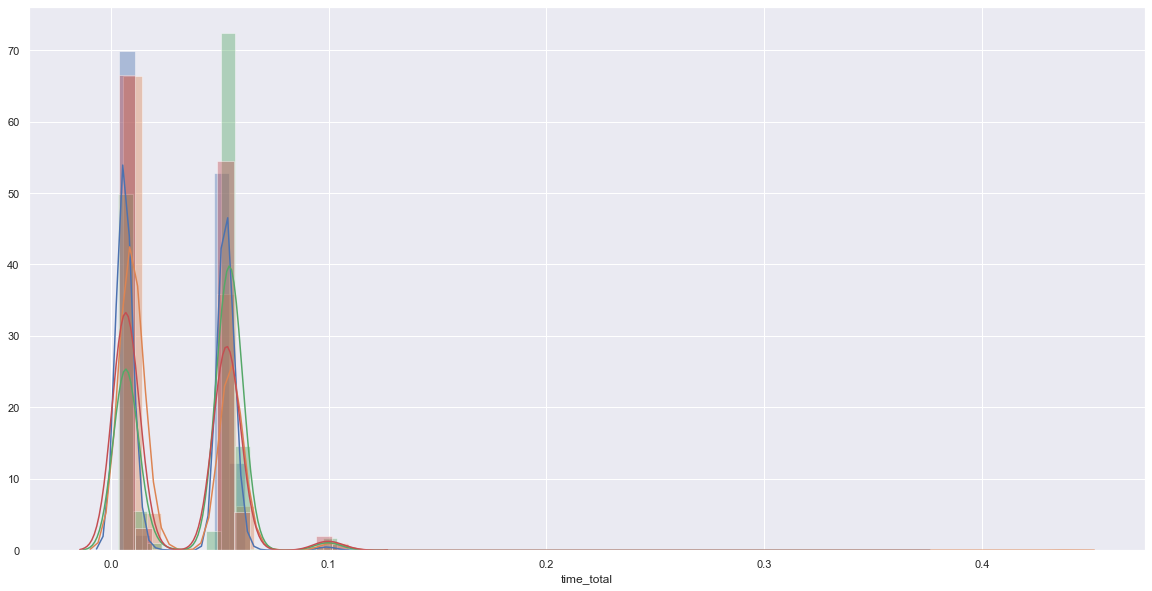

In [54]:
sns.distplot(df_no_opa["time_total"])
sns.distplot(df_opa_all_allow["time_total"])
sns.distplot(df_opa_minimal["time_total"])
sns.distplot(df_opa_bulked_up_100["time_total"])

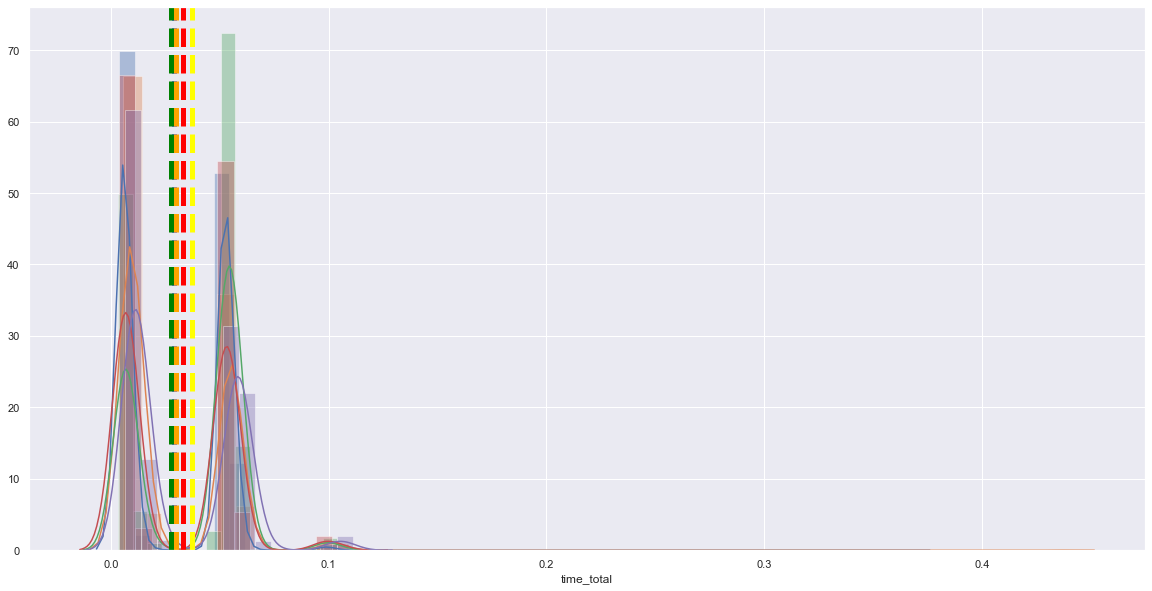

In [75]:
plt.figure()
ax1 = sns.distplot(df_no_opa["time_total"])
ax2 = sns.distplot(df_opa_all_allow["time_total"])
ax3 = sns.distplot(df_opa_minimal["time_total"])
ax4 = sns.distplot(df_opa_bulked_up_100["time_total"])
ax5 = sns.distplot(df_opa_bulked_up_1000["time_total"])
plt.axvline(np.mean(df_no_opa["time_total"]), color='blue', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_all_allow["time_total"]), color='green', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_minimal["time_total"]), color='yellow', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_100["time_total"]), color='orange', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000["time_total"]), color='red', linestyle='dashed', linewidth=5)

In [82]:
# Connection couples that are authorized
authz_couples = [("owner", "vfx-1"), ("vfx-1", "vfx-2"), ("vfx-1", "vfx-3"), ("vfx-2", "color"), ("vfx-3", "sound"), ("color", "hdr"), ("hdr", "owner"), ("sound", "owner")]

df_no_opa_owner_vfx1 = df_no_opa[(df_no_opa.src == "owner") & (df_no_opa.dst == "vfx-1")]
df_no_opa_vfx1_vfx2 = df_no_opa[(df_no_opa.src == "vfx-1") & (df_no_opa.dst == "vfx-2")]
df_no_opa_vfx1_vfx3 = df_no_opa[(df_no_opa.src == "vfx-1") & (df_no_opa.dst == "vfx-3")]
df_no_opa_vfx2_color = df_no_opa[(df_no_opa.src == "vfx-2") & (df_no_opa.dst == "color")]
df_no_opa_vfx3_sound = df_no_opa[(df_no_opa.src == "vfx-3") & (df_no_opa.dst == "sound")]
df_no_opa_color_hdr = df_no_opa[(df_no_opa.src == "color") & (df_no_opa.dst == "hdr")]
df_no_opa_hdr_owner = df_no_opa[(df_no_opa.src == "hdr") & (df_no_opa.dst == "owner")]
df_no_opa_sound_owner = df_no_opa[(df_no_opa.src == "sound") & (df_no_opa.dst == "owner")]

In [78]:
df_no_opa_owner_vfx1.describe()

time_namelookup  time_connect  time_appconnect  time_pretransfer  \
count       551.000000    551.000000            551.0        551.000000   
mean          0.000034      0.000166              0.0          0.000212   
std           0.000029      0.000050              0.0          0.000059   
min           0.000025      0.000123              0.0          0.000164   
25%           0.000028      0.000143              0.0          0.000184   
50%           0.000030      0.000152              0.0          0.000196   
75%           0.000035      0.000175              0.0          0.000220   
max           0.000528      0.000675              0.0          0.000734   

       time_redirect  time_starttransfer  time_total  
count          551.0          551.000000  551.000000  
mean             0.0            0.006070    0.006135  
std              0.0            0.000985    0.000986  
min              0.0            0.004910    0.005112  
25%              0.0            0.005567    0.005633  
50%              0.0            0.005807    0.005867  
75%              0.0            0.006223    0.006285  
max              0.0            0.014801    0.014890

In [79]:
df_no_opa_owner_vfx1

src    dst  time_namelookup  time_connect  time_appconnect  \
0      owner  vfx-1         0.000048      0.000205              0.0   
42     owner  vfx-1         0.000029      0.000165              0.0   
84     owner  vfx-1         0.000034      0.000154              0.0   
126    owner  vfx-1         0.000029      0.000144              0.0   
168    owner  vfx-1         0.000037      0.000165              0.0   
...      ...    ...              ...           ...              ...   
20294  owner  vfx-1         0.000032      0.000165              0.0   
20336  owner  vfx-1         0.000031      0.000138              0.0   
20378  owner  vfx-1         0.000028      0.000149              0.0   
20420  owner  vfx-1         0.000035      0.000171              0.0   
20462  owner  vfx-1         0.000038      0.000187              0.0   

       time_pretransfer  time_redirect  time_starttransfer  time_total  
0              0.000247            0.0            0.007258    0.007348  
42             0.000207            0.0            0.005418    0.005462  
84             0.000194            0.0            0.005816    0.005869  
126            0.000185            0.0            0.006190    0.006243  
168            0.000207            0.0            0.006336    0.006383  
...                 ...            ...                 ...         ...  
20294          0.000209            0.0            0.005452    0.005504  
20336          0.000174            0.0            0.005342    0.005393  
20378          0.000206            0.0            0.005582    0.005637  
20420          0.000212            0.0            0.005464    0.005513  
20462          0.000226            0.0            0.006660    0.006714  

[551 rows x 9 columns]

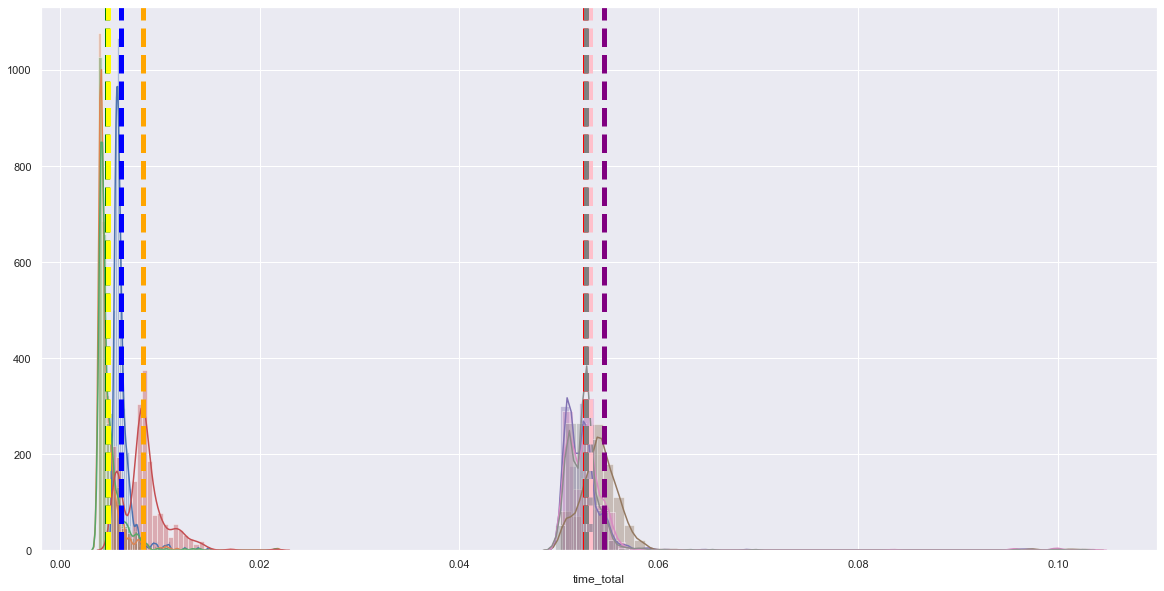

In [81]:
df_no_opa_owner_vfx1 = df_no_opa[(df_no_opa.src == "owner") & (df_no_opa.dst == "vfx-1")]
df_no_opa_vfx1_vfx2 = df_no_opa[(df_no_opa.src == "vfx-1") & (df_no_opa.dst == "vfx-2")]
df_no_opa_vfx1_vfx3 = df_no_opa[(df_no_opa.src == "vfx-1") & (df_no_opa.dst == "vfx-3")]
df_no_opa_vfx2_color = df_no_opa[(df_no_opa.src == "vfx-2") & (df_no_opa.dst == "color")]
df_no_opa_vfx3_sound = df_no_opa[(df_no_opa.src == "vfx-3") & (df_no_opa.dst == "sound")]
df_no_opa_color_hdr = df_no_opa[(df_no_opa.src == "color") & (df_no_opa.dst == "hdr")]
df_no_opa_hdr_owner = df_no_opa[(df_no_opa.src == "hdr") & (df_no_opa.dst == "owner")]
df_no_opa_sound_owner = df_no_opa[(df_no_opa.src == "sound") & (df_no_opa.dst == "owner")]

plt.figure()
ax1 = sns.distplot(df_no_opa_owner_vfx1["time_total"])
ax2 = sns.distplot(df_no_opa_vfx1_vfx2["time_total"])
ax3 = sns.distplot(df_no_opa_vfx1_vfx3["time_total"])
ax4 = sns.distplot(df_no_opa_vfx2_color["time_total"])
ax5 = sns.distplot(df_no_opa_vfx3_sound["time_total"])
ax6 = sns.distplot(df_no_opa_color_hdr["time_total"])
ax7 = sns.distplot(df_no_opa_hdr_owner["time_total"])
ax8 = sns.distplot(df_no_opa_sound_owner["time_total"])
plt.axvline(np.mean(df_no_opa_owner_vfx1["time_total"]), color='blue', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_no_opa_vfx1_vfx2["time_total"]), color='green', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_no_opa_vfx1_vfx3["time_total"]), color='yellow', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_no_opa_vfx2_color["time_total"]), color='orange', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_no_opa_vfx3_sound["time_total"]), color='red', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_no_opa_color_hdr["time_total"]), color='purple', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_no_opa_hdr_owner["time_total"]), color='pink', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_no_opa_sound_owner["time_total"]), color='grey', linestyle='dashed', linewidth=5)

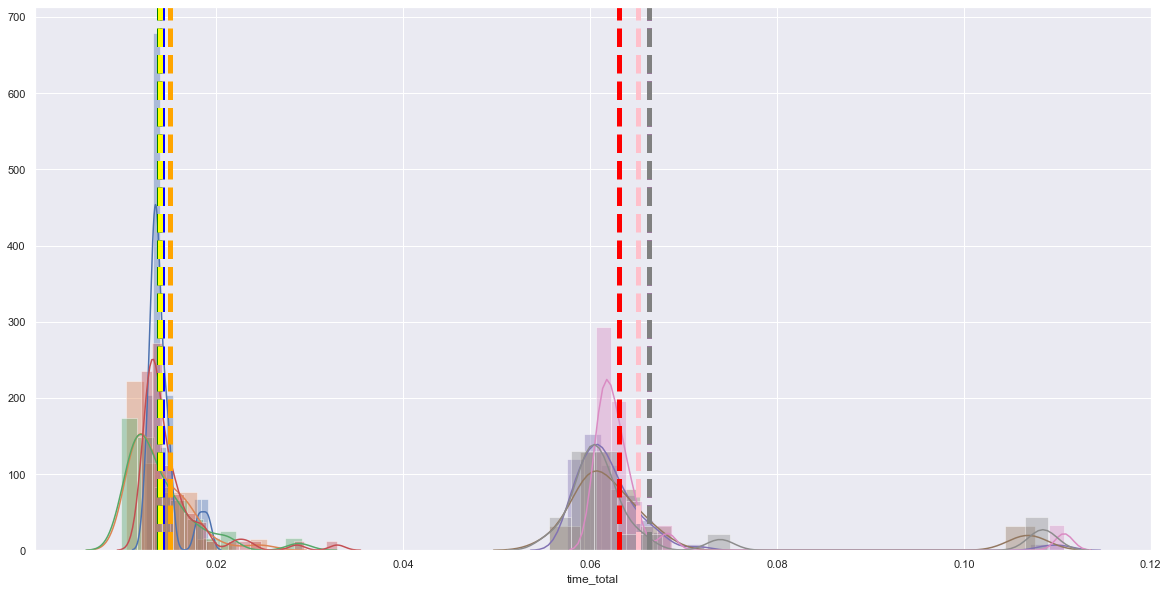

In [83]:
df_opa_bulked_up_1000_owner_vfx1 = df_opa_bulked_up_1000[(df_opa_bulked_up_1000.src == "owner") & (df_opa_bulked_up_1000.dst == "vfx-1")]
df_opa_bulked_up_1000_vfx1_vfx2 = df_opa_bulked_up_1000[(df_opa_bulked_up_1000.src == "vfx-1") & (df_opa_bulked_up_1000.dst == "vfx-2")]
df_opa_bulked_up_1000_vfx1_vfx3 = df_opa_bulked_up_1000[(df_opa_bulked_up_1000.src == "vfx-1") & (df_opa_bulked_up_1000.dst == "vfx-3")]
df_opa_bulked_up_1000_vfx2_color = df_opa_bulked_up_1000[(df_opa_bulked_up_1000.src == "vfx-2") & (df_opa_bulked_up_1000.dst == "color")]
df_opa_bulked_up_1000_vfx3_sound = df_opa_bulked_up_1000[(df_opa_bulked_up_1000.src == "vfx-3") & (df_opa_bulked_up_1000.dst == "sound")]
df_opa_bulked_up_1000_color_hdr = df_opa_bulked_up_1000[(df_opa_bulked_up_1000.src == "color") & (df_opa_bulked_up_1000.dst == "hdr")]
df_opa_bulked_up_1000_hdr_owner = df_opa_bulked_up_1000[(df_opa_bulked_up_1000.src == "hdr") & (df_opa_bulked_up_1000.dst == "owner")]
df_opa_bulked_up_1000_sound_owner = df_opa_bulked_up_1000[(df_opa_bulked_up_1000.src == "sound") & (df_opa_bulked_up_1000.dst == "owner")]

plt.figure()
ax1 = sns.distplot(df_opa_bulked_up_1000_owner_vfx1["time_total"])
ax2 = sns.distplot(df_opa_bulked_up_1000_vfx1_vfx2["time_total"])
ax3 = sns.distplot(df_opa_bulked_up_1000_vfx1_vfx3["time_total"])
ax4 = sns.distplot(df_opa_bulked_up_1000_vfx2_color["time_total"])
ax5 = sns.distplot(df_opa_bulked_up_1000_vfx3_sound["time_total"])
ax6 = sns.distplot(df_opa_bulked_up_1000_color_hdr["time_total"])
ax7 = sns.distplot(df_opa_bulked_up_1000_hdr_owner["time_total"])
ax8 = sns.distplot(df_opa_bulked_up_1000_sound_owner["time_total"])
plt.axvline(np.mean(df_opa_bulked_up_1000_owner_vfx1["time_total"]), color='blue', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_vfx1_vfx2["time_total"]), color='green', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_vfx1_vfx3["time_total"]), color='yellow', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_vfx2_color["time_total"]), color='orange', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_vfx3_sound["time_total"]), color='red', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_color_hdr["time_total"]), color='purple', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_hdr_owner["time_total"]), color='pink', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_sound_owner["time_total"]), color='grey', linestyle='dashed', linewidth=5)

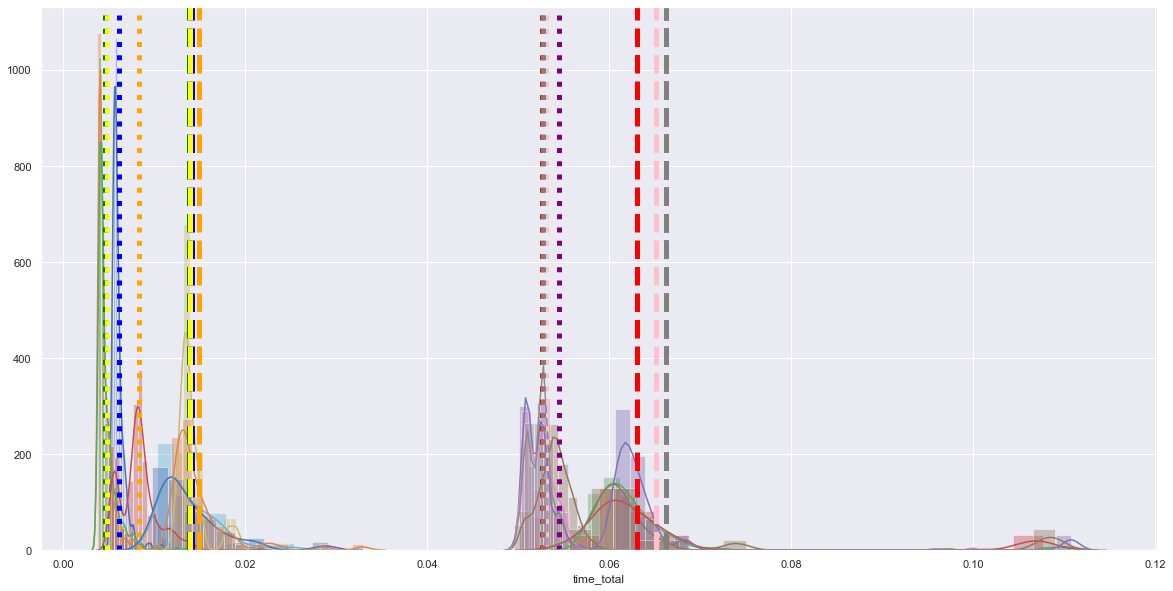

In [85]:
plt.figure()
ax1 = sns.distplot(df_no_opa_owner_vfx1["time_total"])
ax2 = sns.distplot(df_no_opa_vfx1_vfx2["time_total"])
ax3 = sns.distplot(df_no_opa_vfx1_vfx3["time_total"])
ax4 = sns.distplot(df_no_opa_vfx2_color["time_total"])
ax5 = sns.distplot(df_no_opa_vfx3_sound["time_total"])
ax6 = sns.distplot(df_no_opa_color_hdr["time_total"])
ax7 = sns.distplot(df_no_opa_hdr_owner["time_total"])
ax8 = sns.distplot(df_no_opa_sound_owner["time_total"])
plt.axvline(np.mean(df_no_opa_owner_vfx1["time_total"]), color='blue', linestyle='dotted', linewidth=5)
plt.axvline(np.mean(df_no_opa_vfx1_vfx2["time_total"]), color='green', linestyle='dotted', linewidth=5)
plt.axvline(np.mean(df_no_opa_vfx1_vfx3["time_total"]), color='yellow', linestyle='dotted', linewidth=5)
plt.axvline(np.mean(df_no_opa_vfx2_color["time_total"]), color='orange', linestyle='dotted', linewidth=5)
plt.axvline(np.mean(df_no_opa_vfx3_sound["time_total"]), color='red', linestyle='dotted', linewidth=5)
plt.axvline(np.mean(df_no_opa_color_hdr["time_total"]), color='purple', linestyle='dotted', linewidth=5)
plt.axvline(np.mean(df_no_opa_hdr_owner["time_total"]), color='pink', linestyle='dotted', linewidth=5)
plt.axvline(np.mean(df_no_opa_sound_owner["time_total"]), color='grey', linestyle='dotted', linewidth=5)
ax1 = sns.distplot(df_opa_bulked_up_1000_owner_vfx1["time_total"])
ax2 = sns.distplot(df_opa_bulked_up_1000_vfx1_vfx2["time_total"])
ax3 = sns.distplot(df_opa_bulked_up_1000_vfx1_vfx3["time_total"])
ax4 = sns.distplot(df_opa_bulked_up_1000_vfx2_color["time_total"])
ax5 = sns.distplot(df_opa_bulked_up_1000_vfx3_sound["time_total"])
ax6 = sns.distplot(df_opa_bulked_up_1000_color_hdr["time_total"])
ax7 = sns.distplot(df_opa_bulked_up_1000_hdr_owner["time_total"])
ax8 = sns.distplot(df_opa_bulked_up_1000_sound_owner["time_total"])
plt.axvline(np.mean(df_opa_bulked_up_1000_owner_vfx1["time_total"]), color='blue', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_vfx1_vfx2["time_total"]), color='green', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_vfx1_vfx3["time_total"]), color='yellow', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_vfx2_color["time_total"]), color='orange', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_vfx3_sound["time_total"]), color='red', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_color_hdr["time_total"]), color='purple', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_hdr_owner["time_total"]), color='pink', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_sound_owner["time_total"]), color='grey', linestyle='dashed', linewidth=5)

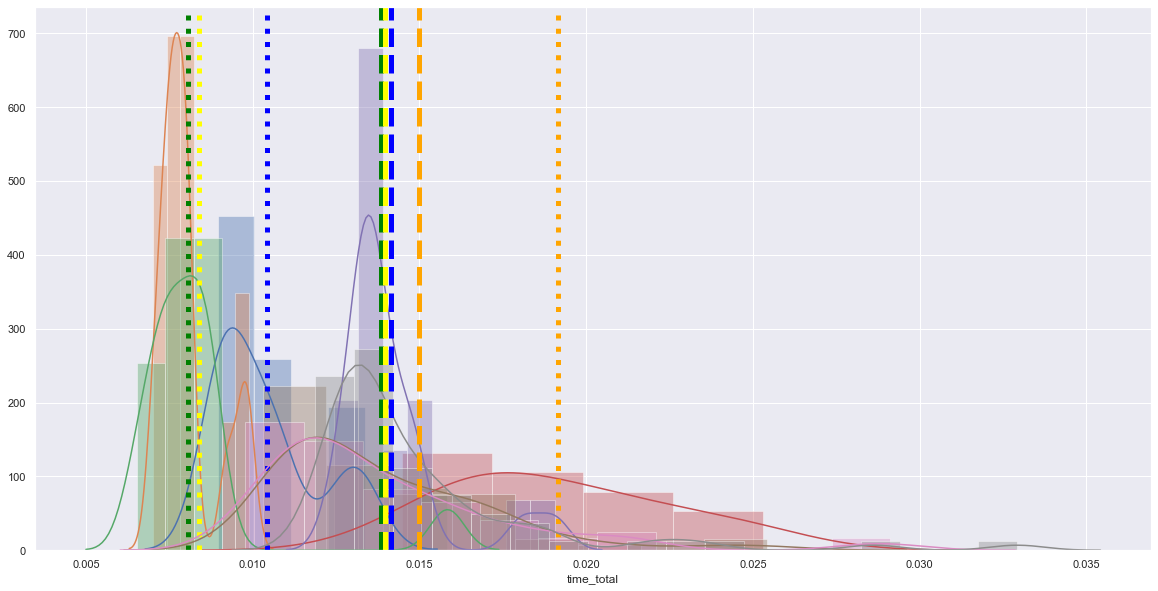

In [89]:
df_opa_minimal_owner_vfx1 = df_opa_minimal[(df_opa_minimal.src == "owner") & (df_opa_minimal.dst == "vfx-1")]
df_opa_minimal_vfx1_vfx2 = df_opa_minimal[(df_opa_minimal.src == "vfx-1") & (df_opa_minimal.dst == "vfx-2")]
df_opa_minimal_vfx1_vfx3 = df_opa_minimal[(df_opa_minimal.src == "vfx-1") & (df_opa_minimal.dst == "vfx-3")]
df_opa_minimal_vfx2_color = df_opa_minimal[(df_opa_minimal.src == "vfx-2") & (df_opa_minimal.dst == "color")]
df_opa_minimal_vfx3_sound = df_opa_minimal[(df_opa_minimal.src == "vfx-3") & (df_opa_minimal.dst == "sound")]
df_opa_minimal_color_hdr = df_opa_minimal[(df_opa_minimal.src == "color") & (df_opa_minimal.dst == "hdr")]
df_opa_minimal_hdr_owner = df_opa_minimal[(df_opa_minimal.src == "hdr") & (df_opa_minimal.dst == "owner")]
df_opa_minimal_sound_owner = df_opa_minimal[(df_opa_minimal.src == "sound") & (df_opa_minimal.dst == "owner")]


plt.figure()
ax1 = sns.distplot(df_opa_minimal_owner_vfx1["time_total"])
ax2 = sns.distplot(df_opa_minimal_vfx1_vfx2["time_total"])
ax3 = sns.distplot(df_opa_minimal_vfx1_vfx3["time_total"])
ax4 = sns.distplot(df_opa_minimal_vfx2_color["time_total"])
#ax5 = sns.distplot(df_opa_minimal_vfx3_sound["time_total"])
#ax6 = sns.distplot(df_opa_minimal_color_hdr["time_total"])
#ax7 = sns.distplot(df_opa_minimal_hdr_owner["time_total"])
#ax8 = sns.distplot(df_opa_minimal_sound_owner["time_total"])
plt.axvline(np.mean(df_opa_minimal_owner_vfx1["time_total"]), color='blue', linestyle='dotted', linewidth=5)
plt.axvline(np.mean(df_opa_minimal_vfx1_vfx2["time_total"]), color='green', linestyle='dotted', linewidth=5)
plt.axvline(np.mean(df_opa_minimal_vfx1_vfx3["time_total"]), color='yellow', linestyle='dotted', linewidth=5)
plt.axvline(np.mean(df_opa_minimal_vfx2_color["time_total"]), color='orange', linestyle='dotted', linewidth=5)
#plt.axvline(np.mean(df_opa_minimal_vfx3_sound["time_total"]), color='red', linestyle='dotted', linewidth=5)
#plt.axvline(np.mean(df_opa_minimal_color_hdr["time_total"]), color='purple', linestyle='dotted', linewidth=5)
#plt.axvline(np.mean(df_opa_minimal_hdr_owner["time_total"]), color='pink', linestyle='dotted', linewidth=5)
#plt.axvline(np.mean(df_opa_minimal_sound_owner["time_total"]), color='grey', linestyle='dotted', linewidth=5)
ax1 = sns.distplot(df_opa_bulked_up_1000_owner_vfx1["time_total"])
ax2 = sns.distplot(df_opa_bulked_up_1000_vfx1_vfx2["time_total"])
ax3 = sns.distplot(df_opa_bulked_up_1000_vfx1_vfx3["time_total"])
ax4 = sns.distplot(df_opa_bulked_up_1000_vfx2_color["time_total"])
#ax5 = sns.distplot(df_opa_bulked_up_1000_vfx3_sound["time_total"])
#ax6 = sns.distplot(df_opa_bulked_up_1000_color_hdr["time_total"])
#ax7 = sns.distplot(df_opa_bulked_up_1000_hdr_owner["time_total"])
#ax8 = sns.distplot(df_opa_bulked_up_1000_sound_owner["time_total"])
plt.axvline(np.mean(df_opa_bulked_up_1000_owner_vfx1["time_total"]), color='blue', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_vfx1_vfx2["time_total"]), color='green', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_vfx1_vfx3["time_total"]), color='yellow', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df_opa_bulked_up_1000_vfx2_color["time_total"]), color='orange', linestyle='dashed', linewidth=5)
#plt.axvline(np.mean(df_opa_bulked_up_1000_vfx3_sound["time_total"]), color='red', linestyle='dashed', linewidth=5)
#plt.axvline(np.mean(df_opa_bulked_up_1000_color_hdr["time_total"]), color='purple', linestyle='dashed', linewidth=5)
#plt.axvline(np.mean(df_opa_bulked_up_1000_hdr_owner["time_total"]), color='pink', linestyle='dashed', linewidth=5)
#plt.axvline(np.mean(df_opa_bulked_up_1000_sound_owner["time_total"]), color='grey', linestyle='dashed', linewidth=5)